In [23]:
from Code import *
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
dane = get_data('data\GSM1173493_cell-1.txt')

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\wikto\AppData\Local\Temp\ipykernel_12244\3334544955.py:1: SyntaxWarning: invalid escape sequence '\G'
  dane = get_data('data\GSM1173493_cell-1.txt')


In [5]:
len(dane)

1251

In [6]:
matrix = create_contact_matrix(dane, size=1000000)
matrix.shape

(104, 104)

### Wizualizacja

<Axes: >

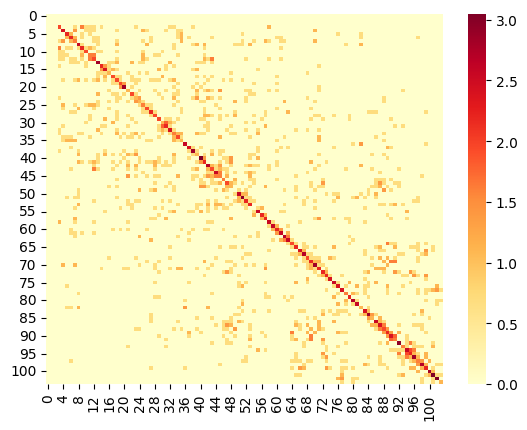

In [7]:
sns.heatmap(np.log1p(matrix), cmap='YlOrRd')

In [8]:
walk = generate_self_avoiding_walk(1251,100)

In [9]:
save_to_pdb(np.array(walk))

File points.pdb saved...


In [10]:
G = generate_graph(walk)

In [10]:
correlation = []
for _ in range(100):
    route, nodes = initalize_route(G)
    for _ in range(10000):
        route, nodes = g_function(G,route, nodes)
    correlation.append(f_function(route, matrix))

Pearson correlation =  0.16993501607061678
Pearson correlation =  0.16213121176257855
Pearson correlation =  0.15881543639545187
Pearson correlation =  0.12415632894544644
Pearson correlation =  0.13901259670495247
Pearson correlation =  0.14744809615901297
Pearson correlation =  0.13935964770441073
Pearson correlation =  0.13525029377625555
Pearson correlation =  0.1518248733184648
Pearson correlation =  0.16966210205726098
Pearson correlation =  0.1004752307226025
Pearson correlation =  0.14515517612642767
Pearson correlation =  0.1851747635581029
Pearson correlation =  0.18169499134245648
Pearson correlation =  0.15859397231927969
Pearson correlation =  0.18377021865197557
Pearson correlation =  0.19428748433749482
Pearson correlation =  0.15928277177941902
Pearson correlation =  0.1450706389822271
Pearson correlation =  0.16957350545546843
Pearson correlation =  0.17283165433947936
Pearson correlation =  0.1458753193716152
Pearson correlation =  0.19915017713072214
Pearson correlat

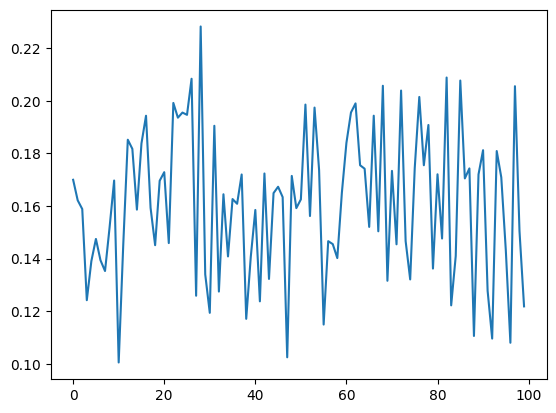

In [11]:
plt.plot(correlation)

In [49]:
route, nodes = initalize_route(G)
for _ in range(10000):
    route, nodes = g_function(G,route, nodes)

In [50]:
f_function(route, matrix)

Pearson correlation =  0.18824516966619764


0.18824516966619764

In [15]:
route, corr, accept, steps = simmulated_annealing(G, 1, matrix, epochs=1000)

Epoch:  0
Epoch:  100
Epoch:  200
Epoch:  300
Epoch:  400
Epoch:  500
Epoch:  600
Epoch:  700
Epoch:  800
Epoch:  900


In [12]:
routes = [0] * 50
corrs = [0] * 50
accepts = [0] * 50
stepss = [0] * 50

In [13]:
for i in range(50):
    print('________________' , i , '_____________')
    routes[i], corrs[i], accepts[i], stepss[i] = simmulated_annealing(G, 1, matrix, epochs=1000)


________________ 0 _____________
Epoch:  0
Epoch:  100
Epoch:  200
Epoch:  300
Epoch:  400
Epoch:  500
Epoch:  600
Epoch:  700
Epoch:  800
Epoch:  900
________________ 1 _____________
Epoch:  0
Epoch:  100
Epoch:  200
Epoch:  300
Epoch:  400
Epoch:  500
Epoch:  600
Epoch:  700
Epoch:  800
Epoch:  900
________________ 2 _____________
Epoch:  0
Epoch:  100
Epoch:  200
Epoch:  300
Epoch:  400
Epoch:  500
Epoch:  600
Epoch:  700
Epoch:  800
Epoch:  900
________________ 3 _____________
Epoch:  0
Epoch:  100
Epoch:  200
Epoch:  300
Epoch:  400
Epoch:  500
Epoch:  600
Epoch:  700
Epoch:  800
Epoch:  900
________________ 4 _____________
Epoch:  0
Epoch:  100
Epoch:  200
Epoch:  300
Epoch:  400
Epoch:  500
Epoch:  600
Epoch:  700
Epoch:  800
Epoch:  900
________________ 5 _____________
Epoch:  0
Epoch:  100
Epoch:  200
Epoch:  300
Epoch:  400
Epoch:  500
Epoch:  600
Epoch:  700
Epoch:  800
Epoch:  900
________________ 6 _____________
Epoch:  0
Epoch:  100
Epoch:  200
Epoch:  300
Epoch:  400
Epo

In [17]:
changes = []
maxes = []
for el in corrs:
    start = el[0]
    end = el[-1]
    maxes.append(end)
    changes.append(end - start)

In [18]:
max_change_index = changes.index(max(changes))
max_max_index = maxes.index(max(maxes))

### Max end

Text(0, 0.5, 'Correlation')

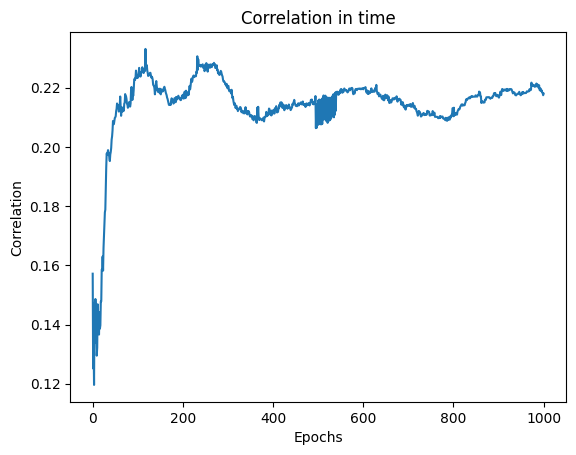

In [20]:
plt.plot(corrs[max_max_index])
plt.title('Correlation in time')
plt.xlabel('Epochs')
plt.ylabel('Correlation')

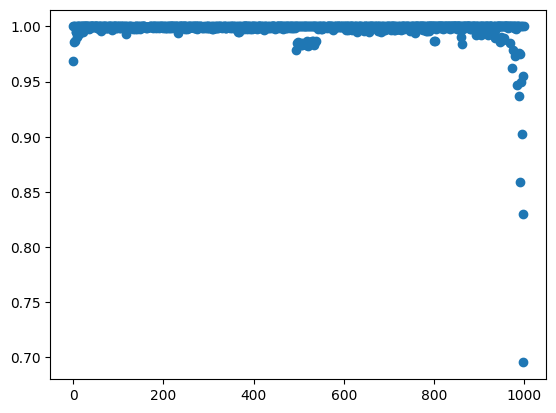

In [21]:
plt.scatter([i for i in range(len(accepts[max_max_index]))],accepts[max_max_index])

Text(0, 0.5, 'Percent of moves')

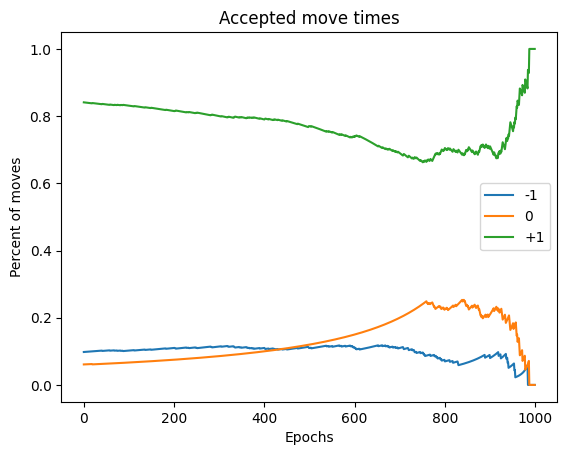

In [24]:
max_steps = accepted_move_types(stepss[max_max_index])
for el in max_steps:
    plt.plot(el)
plt.legend(['-1', '0', '+1'])
plt.title('Accepted move times')
plt.xlabel('Epochs')
plt.ylabel('Percent of moves')

### Max change

Text(0, 0.5, 'Correlation')

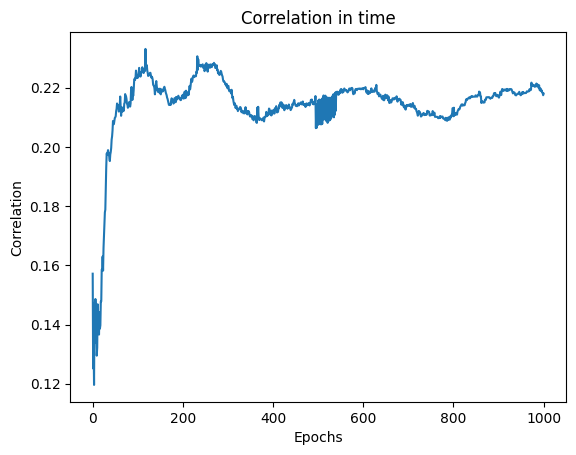

In [26]:
plt.plot(corrs[max_change_index])
plt.title('Correlation in time')
plt.xlabel('Epochs')
plt.ylabel('Correlation')

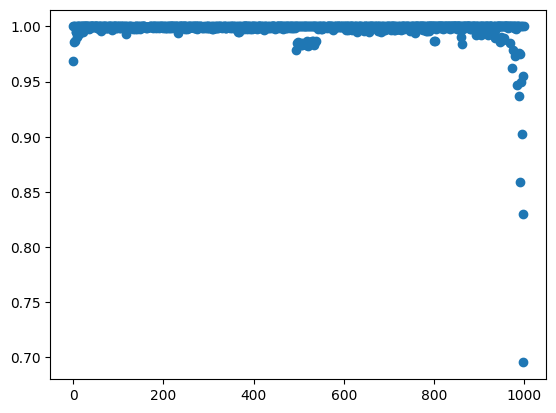

In [28]:
plt.scatter([i for i in range(len(accepts[max_change_index]))],accepts[max_change_index])

Text(0, 0.5, 'Percent of moves')

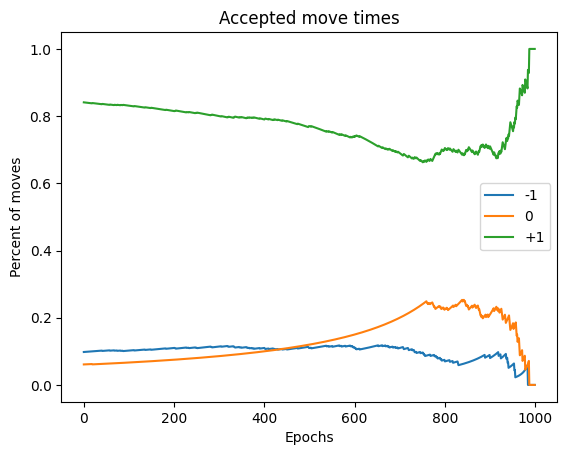

In [29]:
max_steps = accepted_move_types(stepss[max_change_index])
for el in max_steps:
    plt.plot(el)
plt.legend(['-1', '0', '+1'])
plt.title('Accepted move times')
plt.xlabel('Epochs')
plt.ylabel('Percent of moves')

Text(0, 0.5, 'Correlation')

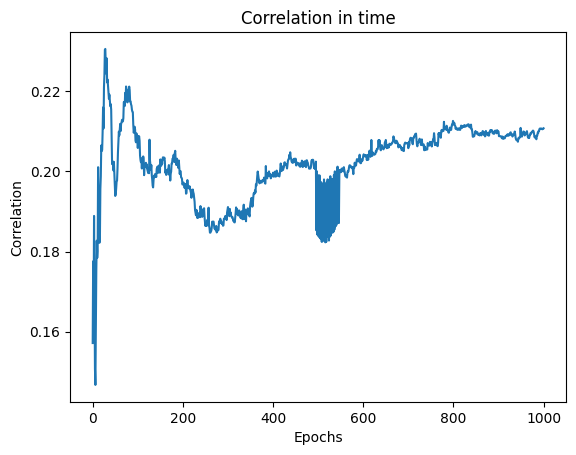

In [16]:
plt.plot(corr)
plt.title('Correlation in time')
plt.xlabel('Epochs')
plt.ylabel('Correlation')

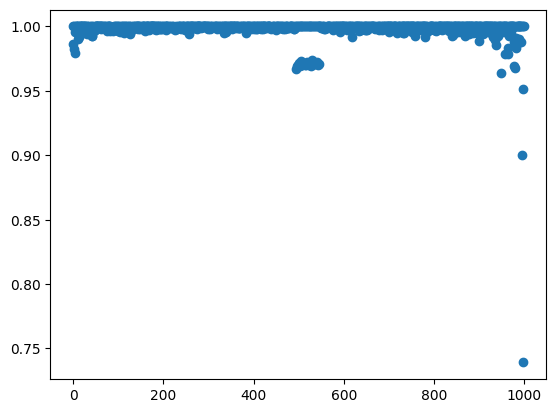

In [17]:
plt.scatter([i for i in range(len(accept))],accept)

In [18]:
step_back = [step == -1 for step in steps]
step_stay = [step == 0 for step in steps]
step_forrward = [step == 1 for step in steps]
length = len(steps)

step_back_new = []
step_stay_new = []
step_forrward_new = []
for i in range(length):
    step_back_new.append(sum(step_back[i:]) / (length - i))
    step_stay_new.append(sum(step_stay[i:]) / (length - i))
    step_forrward_new.append(sum(step_forrward[i:]) / (length - i))

Text(0, 0.5, 'Percent of moves')

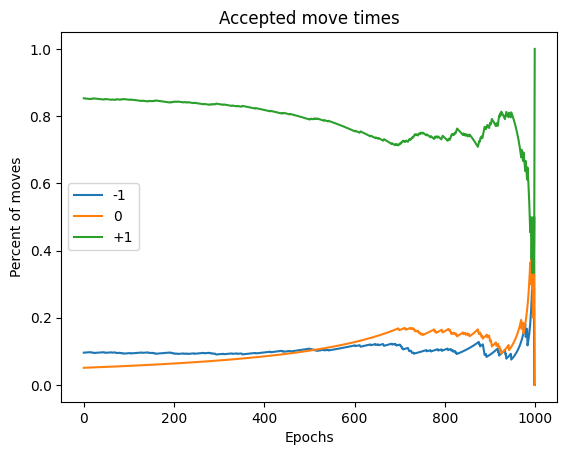

In [19]:
plt.plot(step_back_new)
plt.plot(step_stay_new)
plt.plot(step_forrward_new)
plt.legend(['-1', '0', '+1'])
plt.title('Accepted move times')
plt.xlabel('Epochs')
plt.ylabel('Percent of moves')